In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
circuit = pd.read_csv("Data/circuit_criminal_2019.csv")
x = circuit.groupby(['Charge','CodeSection']).size().reset_index(name="Count").sort_values(by=['Count'], ascending=False)
x['code_and_desc'] = x['CodeSection'] + ', ' + x['Charge']
x = x.drop_duplicates(subset='CodeSection', keep="first")

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-kd_ibi2n because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
top_20_charges = x[0:20]
top_20_charges

,Charge,CodeSection,Count,code_and_desc
12751,VIOL PROBATION ON FEL OFF,19.2-306,7064,"19.2-306, VIOL PROBATION ON FEL OFF"
2143,BOND APPEAL,19.2-124,1531,"19.2-124, BOND APPEAL"
9083,POSS.OF CONTROLLED SUBSTANCE,18.2-250,1421,"18.2-250, POSS.OF CONTROLLED SUBSTANCE"
6740,GRAND LARCENY,18.2-95,1004,"18.2-95, GRAND LARCENY"
7928,OBTAIN MONEY FALSE PRET >=$200,18.2-178,717,"18.2-178, OBTAIN MONEY FALSE PRET >=$200"
6403,FORGERY,18.2-172,664,"18.2-172, FORGERY"
7469,MANUF/ETC CONTROLLED SUBSTANCE,18.2-248,654,"18.2-248, MANUF/ETC CONTROLLED SUBSTANCE"
5837,FAIL TO APPEAR; CONTEMPT,18.2-456,492,"18.2-456, FAIL TO APPEAR; CONTEMPT"
7407,MALICIOUS WOUNDING,18.2-51,492,"18.2-51, MALICIOUS WOUNDING"
9424,POSSESSION OF MARIJUANA,18.2-250.1,419,"18.2-250.1, POSSESSION OF MARIJUANA"


In [6]:
circuit = pd.merge(x, circuit, on="CodeSection")
circuit['code_and_desc'] = circuit['CodeSection'] + ', ' + circuit['Charge']
circuit.head(2)

,Charge,CodeSection,Count_x,code_and_desc_x,Charge_x,Count_y,code_and_desc_y,Charge_y,Count_x,code_and_desc_x,...,RestrictionEffectiveDate,RestrictionEndDate,VAAlcoholSafetyAction,RestitutionPaid,RestitutionAmount,Military,TrafficFatality,AppealedDate,person_id,code_and_desc
0,VIOL PROBATION ON FEL OFF,19.2-306,7064,"19.2-306, VIOL PROBATION ON FEL OFF",VIOL PROBATION ON FEL OFF,7064,"19.2-306, VIOL PROBATION ON FEL OFF",VIOL PROBATION ON FEL OFF,7064,"19.2-306, VIOL PROBATION ON FEL OFF",...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,9.318000e+13,"19.2-306, VIOL PROBATION ON FEL OFF"
1,VIOL PROBATION ON FEL OFF,19.2-306,7064,"19.2-306, VIOL PROBATION ON FEL OFF",VIOL PROBATION ON FEL OFF,7064,"19.2-306, VIOL PROBATION ON FEL OFF",VIOL PROBATION ON FEL OFF,7064,"19.2-306, VIOL PROBATION ON FEL OFF",...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.703000e+13,"19.2-306, VIOL PROBATION ON FEL OFF"


In [7]:
top_20_charges = list(dict(circuit.code_and_desc.value_counts(dropna=False).head(20)).keys())
circuit = circuit[circuit['code_and_desc'].isin(top_20_charges)]
#circuit = circuit[circuit.Race.notnull()] # the graph breaks if there's empty values
#circuit.Race.value_counts(dropna=False)   # this is to check for counts/that nulls are gone

In [8]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() *  (2/3)
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

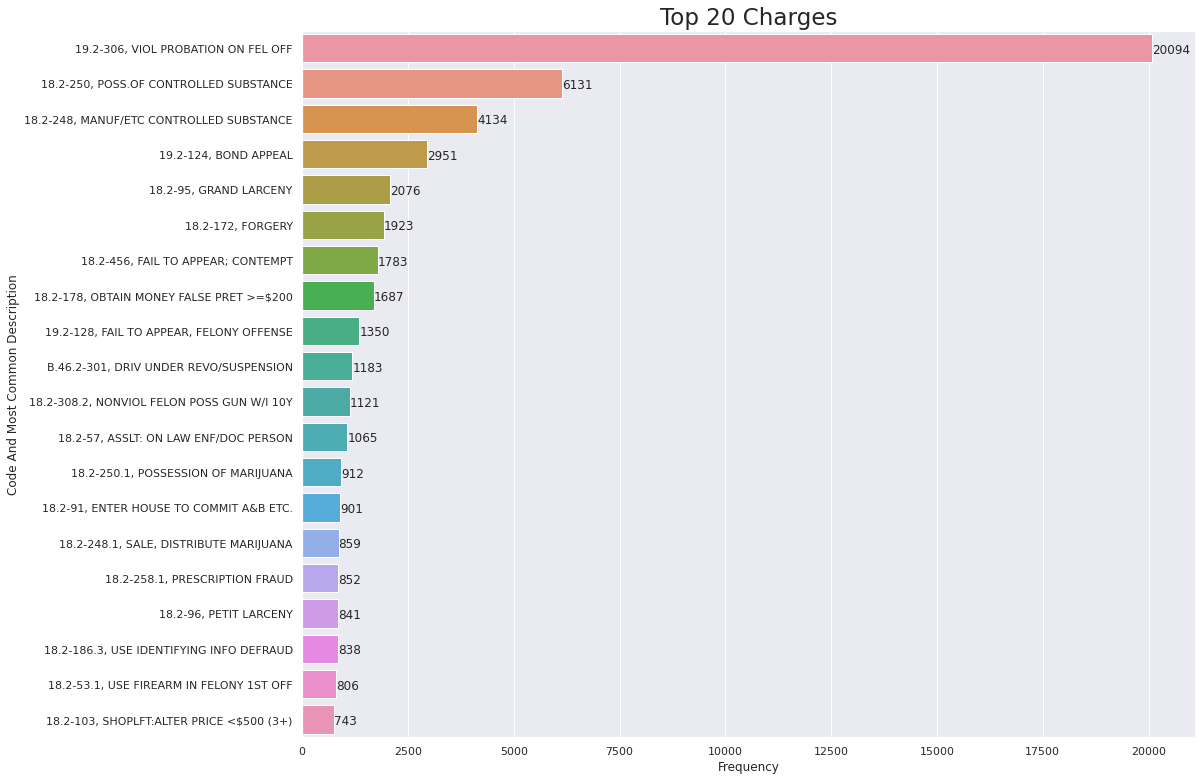

In [9]:
sns.set(rc={'figure.figsize':(16,13)})
sns.set(style="darkgrid")
ax = sns.countplot(y="code_and_desc", 
                 data=circuit,
                 order = circuit['code_and_desc'].value_counts().index)
ax.set(xlabel='Frequency', ylabel='Code And Most Common Description')
ax.set_title('Top 20 Charges', fontsize = 23)
show_values_on_bars(ax, "h", 0.2)
# https://seaborn.pydata.org/generated/seaborn.countplot.html

In [10]:
circuit['code_and_desc'].value_counts().rename_axis('Code and Most Common Description').reset_index(name='Count')

,Code and Most Common Description,Count
0,"19.2-306, VIOL PROBATION ON FEL OFF",20094
1,"18.2-250, POSS.OF CONTROLLED SUBSTANCE",6131
2,"18.2-248, MANUF/ETC CONTROLLED SUBSTANCE",4134
3,"19.2-124, BOND APPEAL",2951
4,"18.2-95, GRAND LARCENY",2076
5,"18.2-172, FORGERY",1923
6,"18.2-456, FAIL TO APPEAR; CONTEMPT",1783
7,"18.2-178, OBTAIN MONEY FALSE PRET >=$200",1687
8,"19.2-128, FAIL TO APPEAR, FELONY OFFENSE",1350
9,"B.46.2-301, DRIV UNDER REVO/SUSPENSION",1183
